Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

This is an “A given B” estimate. In other words, it’s the probability of the delay length, given that a delay has occurred (i.e., flight with greater than 30 minutes late arrival). It is not the overall probability that any given flight will experience such a delay.

http://stat-computing.org/dataexpo/2009/the-data.html
https://www.kaggle.com/giovamata/airlinedelaycauses

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
airlines  = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/DelayedFlights.csv")

In [3]:
airlines.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
list(airlines.columns.values)

['Unnamed: 0',
 'Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

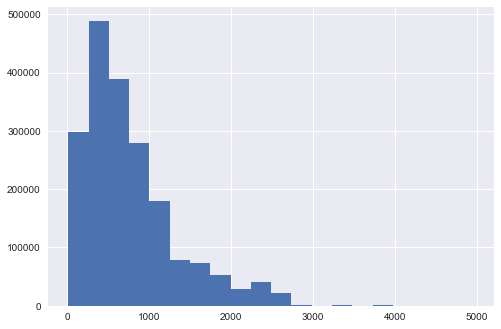

In [5]:
plt.hist(airlines.Distance, bins = 20)
plt.show()

In [ ]:
plt.hist(airlines.ArrDelay, range= [30, 500])
plt.show()

In [ ]:
plt.scatter(airlines.DepDelay,airlines.ArrDelay)
plt.show()

In [12]:
g = airlines.groupby(['UniqueCarrier']).mean('ArrDelay')
c =  airlines.groupby(['UniqueCarrier']).count() 
plt.bar(UniqueCarrier, g, align='center', alpha=0.5)

UnsupportedFunctionCall: numpy operations are not valid with groupby. Use .groupby(...).mean() instead

In [6]:
airlines['delayed'] = np.where(airlines['ArrDelay'] > 30, 1, 0)

airlines['dist_lt500'] = np.where((airlines['Distance'] <500), 1, 0)
airlines['dist_500-1000'] = np.where(((airlines['Distance'] >=500)& (airlines['Distance'] <1000) ), 1, 0)
airlines['dist_gte1000'] = np.where((airlines['Distance'] >=1000 ), 1, 0)


delays = airlines.query('delayed == 1')
# Just winter (JAN)
delays= delays.query(('Month == 1'))
# drop unneccessary columns and correlated columns that describe the type of delay. We're only concerned about the overall arrival delay of greater than 30 min
delays = delays.drop(['Distance','TailNum','CancellationCode','Cancelled','Diverted','FlightNum','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','Unnamed: 0'],1)

In [7]:
# MAke dummies for categorical
#d1 = pd.get_dummies(delays['Month'])
#d2 = pd.get_dummies(delays['DayOfWeek'])
#delays = pd.concat([delays, d1,d2], axis=1)
delays.shape

(80574, 22)

In [8]:
#Add Dep Hour
delays['DepHour'] = round(delays.DepTime/100,0) * 100

In [10]:
delays.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut,delayed,dist_lt500,dist_500-1000,dist_gte1000,DepHour
count,80574.0,80574.0,80574.000000,80574.000000,80574.000000,80574.000000,80574.000000,80574.000000,80574.000000,80574.000000,80574.000000,80574.000000,80574.000000,80574.000000,80574.000000,80574.0,80574.000000,80574.000000,80574.000000,80574.000000
mean,2008.0,1.0,15.492218,3.800060,1580.596371,1483.656490,1619.626455,1650.125375,136.114702,130.035024,106.581155,83.582049,77.502346,7.556830,21.976717,1.0,0.433775,0.344751,0.221473,1566.748579
std,0.0,0.0,9.781617,1.906789,452.406670,418.497352,601.311600,456.818485,71.658796,68.997353,67.981388,62.979293,62.891549,6.712983,17.373611,0.0,0.495598,0.475290,0.415241,453.411982
min,2008.0,1.0,1.000000,1.000000,1.000000,15.000000,1.000000,1.000000,19.000000,19.000000,0.000000,31.000000,6.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.0,6.000000,2.000000,1250.000000,1150.000000,1337.000000,1337.000000,84.000000,80.000000,58.000000,43.000000,39.000000,4.000000,12.000000,1.0,0.000000,0.000000,0.000000,1200.000000
50%,2008.0,1.0,17.000000,4.000000,1633.000000,1525.000000,1746.000000,1720.000000,118.000000,112.000000,88.000000,63.000000,60.000000,6.000000,17.000000,1.0,0.000000,0.000000,0.000000,1600.000000
75%,2008.0,1.0,24.000000,5.000000,1935.000000,1825.000000,2054.000000,2020.000000,168.000000,160.000000,135.000000,102.000000,98.000000,9.000000,26.000000,1.0,1.000000,1.000000,0.000000,1900.000000
max,2008.0,1.0,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2359.000000,693.000000,660.000000,628.000000,1525.000000,1355.000000,189.000000,383.000000,1.0,1.000000,1.000000,1.000000,2400.000000


In [ ]:
from pandas import concat

g = delays.groupby(['DepHour']).mean()
c =  delays.groupby(['DepHour']).count()

hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
summary = concat([g['ArrDelay'], c['delayed']],1)
summary.head(25)
plt.bar(hours,summary['ArrDelay'],color='gray')
plt.plot(hours,summary['delayed']/1000)   #same size for visual purposes, could make 2nd axis but just need to see where most # of flights are
plt.show()
# need to limit analysis to 5am to 8pm or 9pm departure hour flights to avoid outliers with low n

In [ ]:
delays= delays.query('DepHour >= 5')
delays.shape

#delays=delays.query('UniqueCarrier == WN')

In [ ]:
# I am going to drop the categoricals - unique carrier, origin and dest for now

In [ ]:
delays_clean = delays.drop(['UniqueCarrier','Origin','Dest','delayed','DepDelay','ArrTime','CRSArrTime','CRSDepTime','ActualElapsedTime'],1)

In [ ]:
# Define the training and test sizes.
trainsize = int(delays_clean.shape[0] / 2)
delays_train = delays_clean.iloc[:trainsize, :].copy()
delays_test = delays_clean.iloc[trainsize:, :].copy()

In [ ]:
delays_train_X = delays_train.drop(['ArrDelay'],1) 
delays_test_X = delays_test.drop(['ArrDelay'],1) 

delays_train_Y = delays_train.ArrDelay
delays_test_Y = delays_test.ArrDelay

## Model 1: random forest

In [ ]:
# random forest
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfr = ensemble.RandomForestRegressor()

cross_val_score(rfr, delays_train_X, delays_train_Y, cv=10)

In [ ]:
rfr.fit(delays_train_X, delays_train_Y)

In [ ]:
rfr.score(delays_train_X, delays_train_Y)

In [ ]:
rfr.score(delays_test_X, delays_test_Y)

In [ ]:
# Store the result in a new variable.
y_pred_test1= rfr.predict(delays_test_X)
y_pred_train1 = rfr.predict(delays_train_X)

In [ ]:
# graph actuals vs. predicted

In [ ]:
#test
x = delays_test_Y
y = y_pred_test1
plt.scatter(x, y)
#plt.xlim(0, 100)
#plt.ylim(0,100)
plt.show()

In [ ]:
# train
x = delays_train_Y
y = y_pred_train1
plt.scatter(x, y)
plt.xlim(0, 100)
plt.ylim(0,100)
plt.show()

In [ ]:
X = delays_train_X
feature_importance = rfr.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:

indices = np.argsort(feature_importance)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importance[indices[f]]))


In [ ]:
# how much would a linear regression with just dep hour explain

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

linear_formula = 'ArrDelay ~ DepHour+AirTime'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=delays).fit()

print(lm.params)
print(lm.pvalues)
print(lm.rsquared)

In [ ]:
# Instantiate our model.
from sklearn import linear_model
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(delays_train_X, delays_train_Y)
sc = regr.score(delays_train_X, delays_train_Y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('Score: \n', sc)
# Plot outputs
#plt.scatter(delays_train_X, delays_train_Y, color='black')
#plt.plot(delays_train_X, regr.predict(delays_train_X), color='blue', linewidth=3)
#plt.show()

### Linear bad, trying KNN Regression

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(delays_train_X, delays_train_Y)

knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(delays_train_X, delays_train_Y)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, delays_train_X, delays_train_Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, delays_train_X, delays_train_Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

OK, something is wrong or there is no way to explain this!

### SVM 

In [ ]:
from sklearn.svm import SVR
import numpy as np
SVM_regression = SVR(C=1.0, epsilon=0.2)
SVM_regression.fit(delays_train_X, delays_train_Y) 

In [ ]:
SVM_regression.score(delays_train_X, delays_train_Y) 

In [ ]:
## Correlation Matrix
cmap = sns.heatmap(delays_clean)